In [32]:
from skimage import feature
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib
from skimage.feature import hog


In [20]:
import pickle

file_name = './model/faceShapeFemale.pkl'
with open(file_name, 'rb') as file:
    model = pickle.load(file)

In [7]:
dir = './sample/Heart'
detector = dlib.get_frontal_face_detector()

In [30]:
def cropped_image(image, face):
    # Increase the bounding box size
    left = max(0, int(face.left()*0.8))
    top = max(0, int(face.top()*0.5))
    right = min(image.shape[1], int(face.right()*1.1))
    bottom = min(image.shape[0], int(face.bottom()*1.1))
    
    # Crop the face
    cropped = image[top:bottom, left:right]
    return cropped

def rescale_image(image, max_dimension=200):
    height, width = image.shape[:2]

    AR = max_dimension / max(height, width)

    # Calc the precentage
    new_width = int(width * AR)
    new_height = int(height * AR)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    return resized_image

def pre_processing(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(img_gray)  
    for face in faces:
        cropped = cropped_image(img, face)
        resized_cropped = rescale_image(cropped)
        resized_cropped_gray = cv2.cvtColor(resized_cropped, cv2.COLOR_RGB2GRAY)
        return resized_cropped_gray
    
def extract_features(image):
    # Resize the image to 128x128
    image_resized = cv2.resize(image, (128, 128))
    # Compute HOG descriptors
    features, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(4, 4), block_norm="L2", visualize=True)
    return features, hog_image

def skin_tone_type()

In [43]:
def wrapped_model(img_path):
    img = cv2.imread(img_path)
    img_processed = pre_processing(img)
    hog_feature, _ =  extract_features(img_processed)
    res = model.predict(hog_feature.reshape(1, -1))
    return int(res[0])

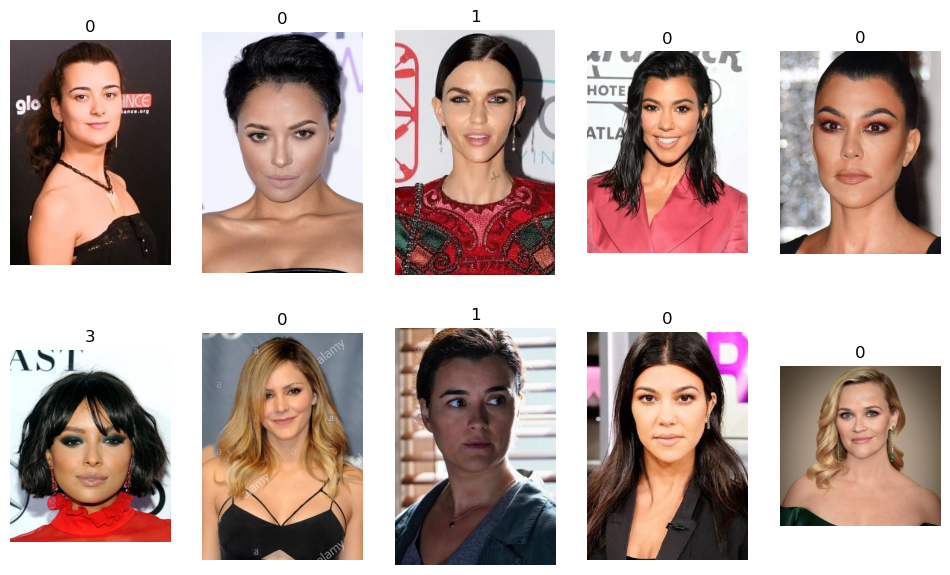

In [48]:
imgList = os.listdir(dir)
i = 0
fig, ax = plt.subplots(2, 5, figsize=(12, 7))
for imgDir in imgList:

    img_path = os.path.join(dir + "\\" + imgDir)
    ans = wrapped_model(img_path)

    img = cv2.imread(img_path)
    ax[i // 5, i % 5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 5, i % 5].set_title(ans)
    ax[i // 5, i % 5].axis('off')
    i += 1